<a href="https://colab.research.google.com/github/Efrat-p1/Predicting-customer-churn/blob/main/Project4_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting customer churn according to customer characteristics

**Classification Project**

* Chanan Zevin
* Efrat Weil Pinhas

21/06/2022

# Overview

1. Dataset and Objective
2. EDA
    * Initial analysis
    * Dropping Redundant Columns
    * Handling Missing Values
    * Correlation Matrix
    * Columns distribution
    * Pre-Processing
3. Handling Data Imbalanced
4. Model selection
5. Loss Expectaion
6. Settitng threshold- "cost function"
7. Pipline
8. Further Analysis



#1. Dataset and Objective

## 1.1 Introduction

* Churned customers are those who have decided to end their relationship with their existing company. In our case study, we will be working on a churn dataset.

* XYZ is a service-providing company that provides customers with a one-year subscription plan for their product. The company wants to know if the customers will renew the subscription for the coming year or not.

* Link
https://www.projectpro.io/


## 1.2 Objective

* Build a classification model on the given dataset to determine whether the customer will churn or not.





## 1.3 Columns description

* This data provides information about a video streaming service company, where they want to predict if the customer will churn or not. The CSV consists of around 2000 rows and 16 columns.

1. Year
2. Customer_id - assumed to be a unique identifier representing one customer
3. Phone_no - customer phone no
4. Gender -Male/Female
5. Age
6. No of days subscribed - the number of days since the subscription
7. Multi-screen - does the customer have a single/ multiple screen subscription
8. Mail subscription - customer receive mails or not
9. Weekly mins watched - number of minutes watched weekly
10. Minimum daily mins - minimum minutes watched
11. Maximum daily mins - maximum minutes watched
12. Weekly nights max mins - number of minutes watched at night time
13. Videos watched - total number of videos watched
14. Maximum_days_inactive - days since inactive
15. Customer support calls - number of customer support calls 
16. Churn -
● 1- Yes
● 0 - No

## 1.4 Get dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import math
import pandas as pd
import seaborn as sns
import warnings

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from pandas.core.dtypes.common import is_numeric_dtype

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, log_loss, recall_score, roc_curve, roc_auc_score, accuracy_score,classification_report
from sklearn.metrics import mean_squared_error as mse
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer

from six import StringIO
from sklearn.tree import export_graphviz
!pip install pydot
import pydot
from IPython.display import Image
from google.colab import files

def csv_drive_path_generatoer(url):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path = csv_drive_path_generatoer('https://drive.google.com/file/d/1EH0ZuSov32m7qwrmnLSyiBbUZ9Y9Iml5/view?usp=sharing')
data = pd.read_csv(path, index_col=0)

In [ ]:
data.head()

,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
year,,,,,,,,,,,,,,,
2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


# 2. EDA

## 2.1 Initial analysis
* One duplicate values in “id” column (id =530490)
Two customers with the same identification number. On re-examination it appears that this is not the same customer. Therefore the line was not deleted

* 1.2% missing values in “gender” column.
* 1.4% missing values in "maximum_days_inactive column"
* 1.75% missing values in "churn" column


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 2015 to 2015
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             2000 non-null   int64  
 1   phone_no                2000 non-null   object 
 2   gender                  1976 non-null   object 
 3   age                     2000 non-null   int64  
 4   no_of_days_subscribed   2000 non-null   int64  
 5   multi_screen            2000 non-null   object 
 6   mail_subscribed         2000 non-null   object 
 7   weekly_mins_watched     2000 non-null   float64
 8   minimum_daily_mins      2000 non-null   float64
 9   maximum_daily_mins      2000 non-null   float64
 10  weekly_max_night_mins   2000 non-null   int64  
 11  videos_watched          2000 non-null   int64  
 12  maximum_days_inactive   1972 non-null   float64
 13  customer_support_calls  2000 non-null   int64  
 14  churn                   1965 non-null

In [ ]:
data.describe().round(2)

,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,1972.00,2000.00,1965.00
mean,554887.16,38.69,99.75,270.18,10.20,30.62,100.42,4.48,3.25,1.55,0.13
std,261033.69,10.21,39.76,80.55,2.79,9.13,19.53,2.49,0.81,1.32,0.34
min,100198.00,18.00,1.00,0.00,0.00,0.00,42.00,0.00,0.00,0.00,0.00
25%,328634.75,32.00,73.00,218.21,8.40,24.74,87.00,3.00,3.00,1.00,0.00
50%,567957.50,37.00,99.00,269.92,10.20,30.59,101.00,4.00,3.00,1.00,0.00
75%,773280.25,44.00,127.00,324.68,12.00,36.80,114.00,6.00,4.00,2.00,0.00
max,999961.00,82.00,243.00,526.20,20.00,59.64,175.00,19.00,6.00,9.00,1.00


In [ ]:
0.13333333*1965

261.99999345

**13.3% churne ----> absolute number 262 people**

In [ ]:
data['churn'].isnull().sum()

35

In [ ]:
(data['churn']==1).sum()

262

In [ ]:
(data['churn']==0).sum()

1703

## 2.2 Dropping Redundant Columns

* customer_id- unique identifier for each row - does not contribute to the analysis
* phone_no- does not contribute to the analysis

In [ ]:
data1 = data.reset_index().drop(['customer_id','phone_no','year'],  axis=1)
data1.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


## 2.3 Handling Missing Values

In [ ]:
data1.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [ ]:
data1['gender'] = data1['gender'].fillna(data1['gender'].mode());
data1['maximum_days_inactive'] = data1['maximum_days_inactive'].fillna(data1['maximum_days_inactive'].median());
data1 = data1.dropna()

## 2.4 Columns Distribution
* The columns distribution between the general customers to the and the churned customers:

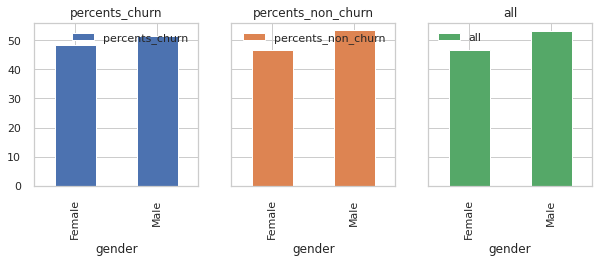

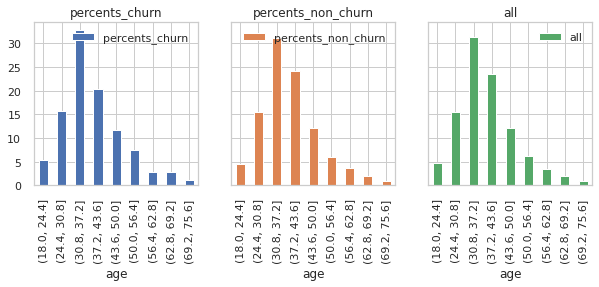

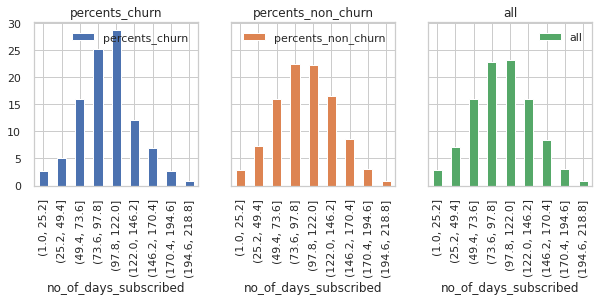

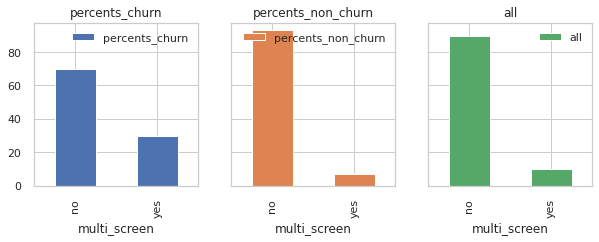

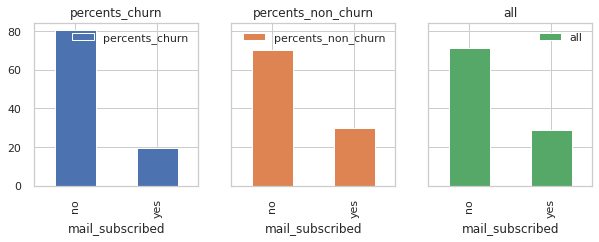

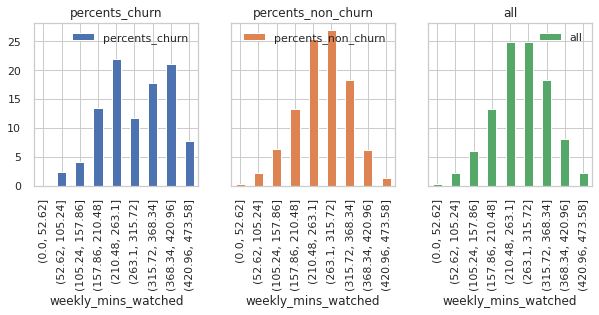

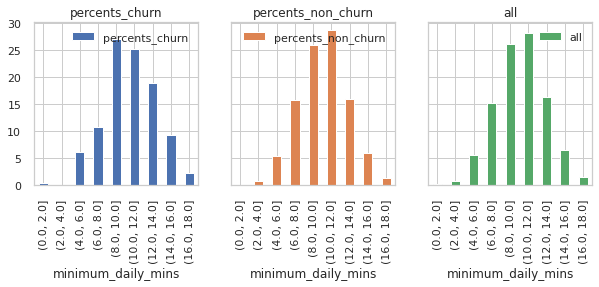

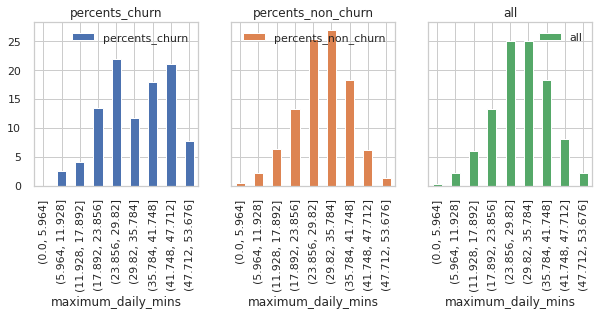

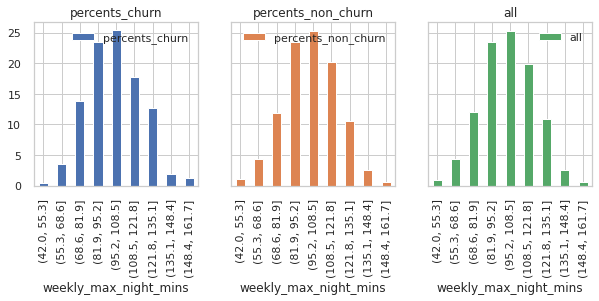

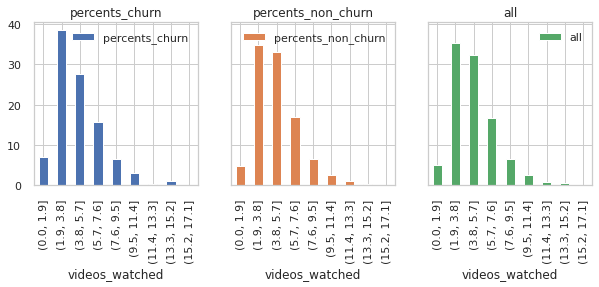

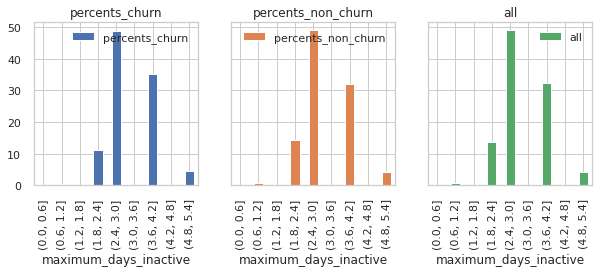

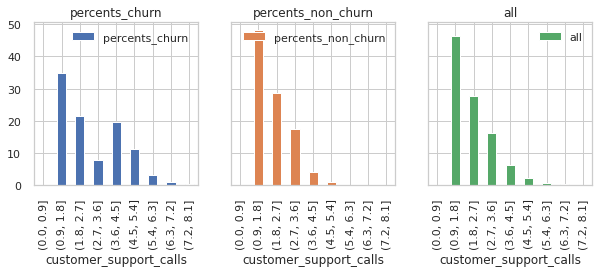

In [ ]:
for i, column in enumerate([col for col in data1.columns if (col != 'churn')]):
                                                           
    if is_numeric_dtype(data1[column]):  
        max = data1[column].max()
        min = data1[column].min()
        bins = np.arange(min,max, (max-min)/10)
        param_c = pd.cut(data1[data1['churn']==1][column], bins=bins)
        param_nc = pd.cut(data1[data1['churn']==0][column], bins=bins)
        param_a = pd.cut(data1[column], bins=bins)        
    else:
        param_c,param_nc, param_a  = column, column, column

    df1 = data1[data1['churn']==1].groupby(param_c).agg({'age':'count'}).rename(columns = {'age': 'percents'}).transform(lambda x: (x/x.sum()*100))
    df2 = data1[data1['churn']==0].groupby(param_nc).agg({'age':'count'}).rename(columns = {'age': 'percents'}).transform(lambda x: (x/x.sum()*100))
    df3 = data1.groupby(param_a).agg({'age':'count'}).rename(columns = {'age': 'percents'}).transform(lambda x: (x/x.sum()*100))
    df = df1.join(df2,lsuffix='_churn', rsuffix='_non_churn').join(df3).rename(columns = {'percents': 'all'})    
    
    df.plot(kind='bar', figsize=(10,3),grid=True , layout=(1,3) , sharey= True, subplots=True );


The columns in which there is a significant change between "churn" and 


"non-churn" are:
* multi-screen- In general, "churn" has more than one screen.
* customer_support_calls- "churn" call more to customer service.
* mail_subscribed-  "churn" customers are less subscribed to mails

In [ ]:
data_t= data1.replace({'Female':0, 'Male':1, 'no':0, 'yes':1})
data_t.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
data_t[data_t['churn']==0]['multi_screen'].mean()

0.07019631171921475

In [ ]:
results =[]
for i, column in enumerate([col for col in data_t.columns if ((col != 'customer_id') & 
                                                            (col != 'phone_no') & 
                                                            (col != 'churn'))]):
    
    if is_numeric_dtype(data_t[column]):  
        mean_churn = data_t[data_t['churn']==1][column].mean()
        mean_non_churn = data_t[data_t['churn']==0][column].mean()
        std_non_churn = data_t[data_t['churn']==0][column].std()

    results += [[column, mean_churn, mean_non_churn, std_non_churn]]

df = pd.DataFrame(results, columns= ['column', 'mean_churn', 'mean_non_churn', 'std_non_churn'])
df['abs_diff'] = abs((df['mean_churn']- df['mean_non_churn'])/df['mean_churn'])*100
df.sort_values(by='abs_diff', ascending=False).round(2)

,column,mean_churn,mean_non_churn,std_non_churn,abs_diff
3,multi_screen,0.30,0.07,0.26,76.60
4,mail_subscribed,0.20,0.30,0.46,52.85
11,customer_support_calls,2.22,1.44,1.16,35.38
5,weekly_mins_watched,305.20,264.61,75.20,13.30
7,maximum_daily_mins,34.59,29.99,8.52,13.30
6,minimum_daily_mins,10.66,10.11,2.75,5.11
0,gender,0.52,0.53,0.50,3.65
9,videos_watched,4.36,4.51,2.46,3.40
10,maximum_days_inactive,3.33,3.23,0.81,3.13
1,age,39.04,38.61,9.97,1.11


##2.5 Correlation Matrix

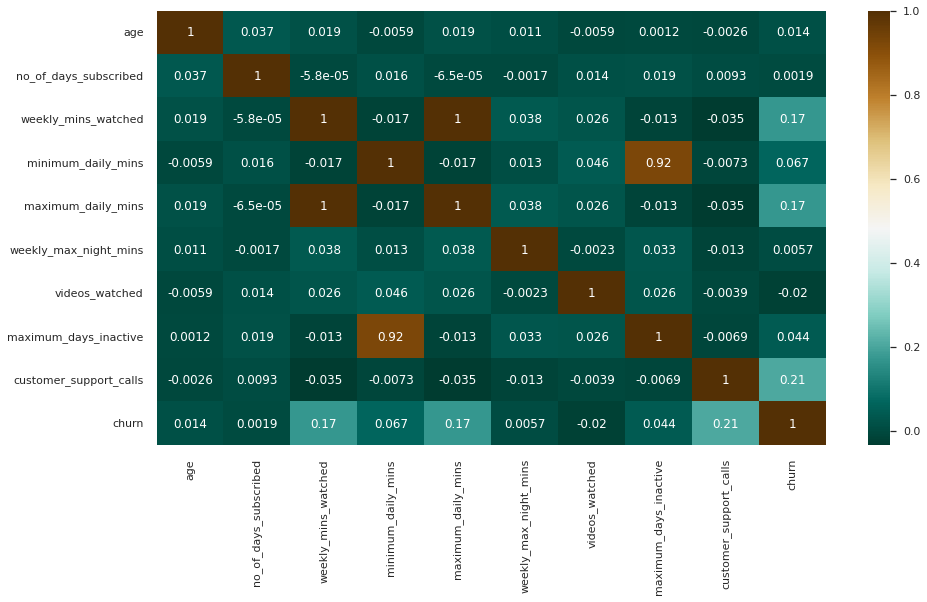

In [ ]:
corr_matrix=data1.corr()
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.heatmap(corr_matrix,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

Summary:
* No significant correlation of any feature with the target variable.
* Almost no observable correlations between the different features.

## 2.6 Feature Correlation

In [ ]:
data2 =data1.copy()
X = data2.drop('churn', axis =1)
X = pd.get_dummies(X)
y = data2['churn']

This visualizer calculates Pearson correlation coefficients and mutual information between features and the dependent variable. This visualization can be used in feature selection to identify features with high correlation or large mutual information with the dependent variable.

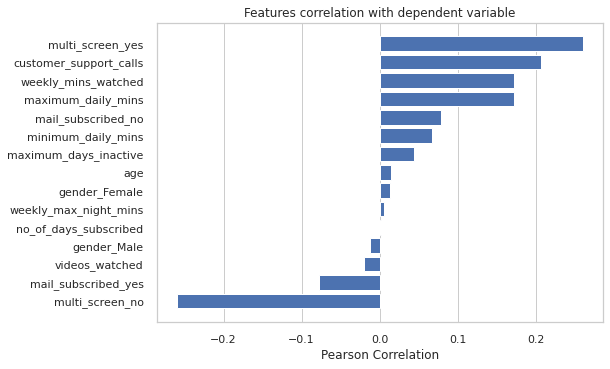

In [ ]:
from yellowbrick.target.feature_correlation import feature_correlation
visualizer = feature_correlation(X, y,sort=True)

## 2.7 Pre-Processing

* Applied dummy variables to categorical features and dropped categorical columns.
* Split the data using train_test_split (75/25).
* Applied StandardScaler to all values in X.



In [ ]:
scaler = StandardScaler()
data_transformed = scaler.fit(X, y).transform(X)
X = pd.DataFrame(data_transformed, columns =X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

# 3. Handling Imbalanced Data

##3.1 SMOTE

We take care of imbalanced data only in Train set.

The chosen techniques: We first oversample the minority class to have 10 percent the number of examples of the majority class (227 --> about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (about 2,000).

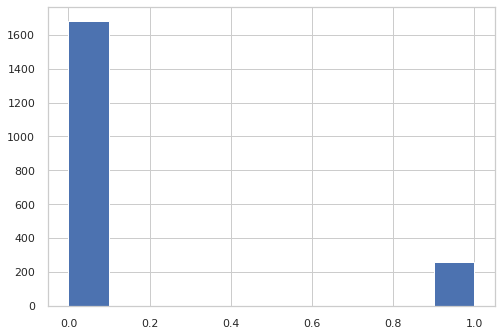

In [ ]:
data2['churn'].hist()

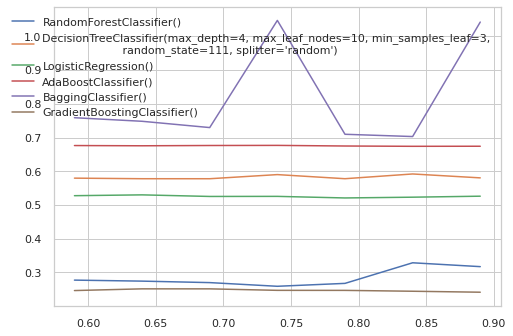

In [ ]:
res = []

models = [RandomForestClassifier(),
          DecisionTreeClassifier(splitter="random", max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, random_state=111),
          LogisticRegression(),
          AdaBoostClassifier(),
          BaggingClassifier(),
          GradientBoostingClassifier(),
          ]
for model in models:
    # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
    # print(f"Before over under sampeling : counter = {Counter(y_train)}")
    for sampling_strategy in np.arange(0.59, 0.9, 0.05):
        # Prepare strategies
        # print(sampling_strategy) 
        # print(f"Before over under sampeling : counter = {Counter(y_train)}")
        oversample = SMOTE(sampling_strategy=sampling_strategy)
        underrsample = RandomUnderSampler(sampling_strategy=0.9)

        # Over sampling 
        X_over, y_over = oversample.fit_resample(X_train, y_train)
        # print(f"after over sampeling : counter = {Counter(y_over)}")

        # Under sampling 
        X_under, y_under = underrsample.fit_resample(X_over, y_over)
        # print(f"after under sampeling:  counter = {Counter(y_under)}")

        model.fit(X_under, y_under)
        y_test_pred = model.predict(X_test)
        y_test_pred_proba = model.predict_proba(X_test)
        log_loss_test = log_loss(y_test , y_test_pred_proba)
        res += [[sampling_strategy, log_loss_test,model]] 
        res_arr = np.array(res)

sns.lineplot(x=res_arr[:,0], y=res_arr[:,1], hue=res_arr[:,2])

Conclusion:

In [ ]:
# data2 =data1.copy()
# data2['churn'] = data1['churn'].fillna(data1['churn'].median());
# X = data2.drop('churn', axis =1)
# X = pd.get_dummies(X)
# y = data2['churn']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
# Prepare strategies 
print(f"Before over under sampeling : counter = {Counter(y_train)}")
oversample = SMOTE(sampling_strategy=0.85)
underrsample = RandomUnderSampler(sampling_strategy=0.9)

# Over sampling 
X_over, y_over = oversample.fit_resample(X_train, y_train)
print(f"after over sampeling : counter = {Counter(y_over)}")

# Under sampling 
X_under, y_under = underrsample.fit_resample(X_over, y_over)
print(f"after under sampeling:  counter = {Counter(y_under)}")


X_train, y_train  = X_over, y_over 

Before over under sampeling : counter = Counter({0.0: 1257, 1.0: 198})
after over sampeling : counter = Counter({0.0: 1257, 1.0: 1068})
after under sampeling:  counter = Counter({0.0: 1186, 1.0: 1068})


13.6%
47.4%





#4. Model selection

## 4.1 DecisionTree Classifier

In [ ]:
dt = DecisionTreeClassifier(splitter="random", max_depth=4, max_leaf_nodes=10, min_samples_leaf=3, random_state=111)
dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)
y_test_pred_proba = dt.predict_proba(X_test)
log_loss_test = log_loss(y_test , y_test_pred_proba)
log_loss_test

0.5738931699720744

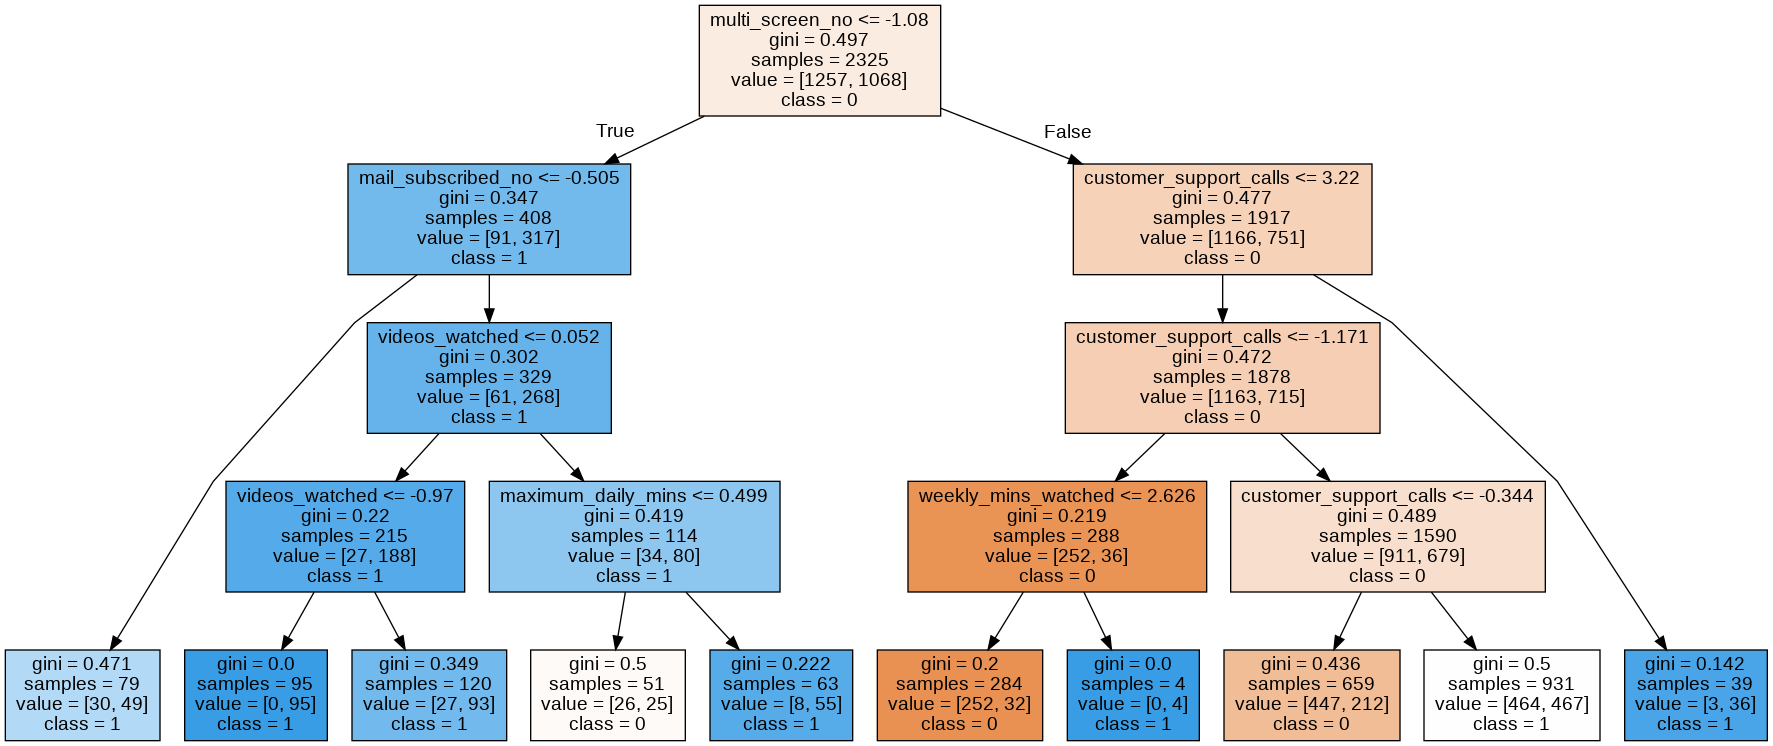

In [ ]:
target_names = ['0', '1']

dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data, feature_names=X.columns, 
                leaves_parallel=True, filled=True, class_names=target_names)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=1000)

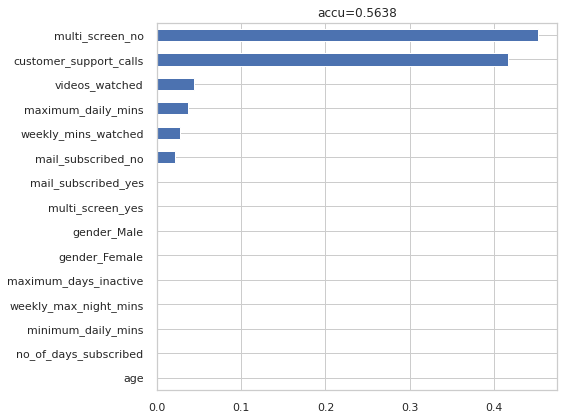

In [ ]:
y_test_pred = dt.predict(X_test)
plt.figure(figsize = (8,6)) 
accu = (y_test_pred == y_test).sum()/len(y_test)
plt.title(f'accu={accu:0.4f}')
feature_importances = pd.Series(
    dt.feature_importances_, 
    index=dt.feature_names_in_
    ).sort_values()
feature_importances.plot.barh()
plt.tight_layout()

In [ ]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0,1])

pd.DataFrame(cm,
             index=dt.classes_,
             columns=dt.classes_)

,0.0,1.0
0.0,234,190
1.0,22,40


In [ ]:
y_test_pred.sum()

230.0

Grid Search based on Decision Tree (with 10-Fold cross-validation)

In [ ]:
param_grid = {'max_depth': [3, 7, 12], 'min_samples_leaf': [5, 15, 40],'min_samples_split': [3, 5, 10]} # 'max_leaf_nodes': [5,8]

In [ ]:
grid_search = GridSearchCV(estimator = dt,  scoring='neg_log_loss', param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 27 candidates, totalling 54 fits


DecisionTreeClassifier(max_depth=12, max_leaf_nodes=10, min_samples_leaf=15,
                       min_samples_split=3, random_state=111,
                       splitter='random')

In [ ]:
dt = DecisionTreeClassifier(max_depth=12, max_leaf_nodes=10, min_samples_leaf=15,
                       min_samples_split=3, random_state=111,
                       splitter='random')
dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)
accu = (y_test_pred == y_test).sum()/len(y_test)
accu

0.7695473251028807

In [ ]:
print('Classification report: \n', classification_report(y_test,y_test_pred))

Classification report: 
               precision    recall  f1-score   support

         0.0       0.92      0.80      0.86       424
         1.0       0.29      0.55      0.38        62

    accuracy                           0.77       486
   macro avg       0.61      0.68      0.62       486
weighted avg       0.84      0.77      0.80       486



##4.2 Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
y_test_pred_proba = rf.predict_proba(X_test)
log_loss_test = log_loss(y_test , y_test_pred_proba)
log_loss_test

0.2502174032751605

In [ ]:
print('Classification report: \n', classification_report(y_test,y_test_pred))

Classification report: 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       424
         1.0       0.72      0.74      0.73        62

    accuracy                           0.93       486
   macro avg       0.84      0.85      0.84       486
weighted avg       0.93      0.93      0.93       486



##4.3 Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
y_test_pred_proba = lr.predict_proba(X_test)
log_loss_test = log_loss(y_test , y_test_pred_proba)
log_loss_test

0.5185048937768876

In [ ]:
len(y_test_pred_proba[:,1])
len(y_test)

486

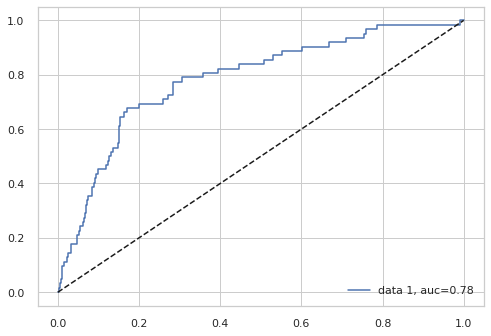

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_test_pred_proba[:,1], pos_label=1)
auc = roc_auc_score(y_test,  y_test_pred_proba[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc,2)))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

## 4.4 Comparison of models after cv

In [ ]:
data2 =data1.copy()
X = data2.drop('churn', axis =1)
X = pd.get_dummies(X)
y = data2['churn']
scaler = StandardScaler()
data_transformed = scaler.fit(X, y).transform(X)
X = pd.DataFrame(data_transformed, columns =X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [ ]:
param_grid_lr = [{'penalty':['l1','l2'], 
              'C':[0.001,0.01, 0.1, 10,100, 1000]}]

param_grid_gb = {
    'max_depth': [5, 10, 20,25, 30],
    'min_samples_leaf': [1,2, 3, 4,5, 6],
    'max_leaf_nodes': [2,5,10,15,20]
            }

param_grid_rf = param_grid_gb
param_grid_dt = param_grid_gb

param_grid_ab  = {
    'n_estimators': [50,100],
    'learning_rate': [0.5, 1,5]}

param_grid_b  = {
    'n_estimators': [10 ,50,100],
    'bootstrap': [True, False],
    'max_samples': [1,2,3,5,10]}

param_grid_v = {}

param_grid_knn = {'n_neighbors': [2 ,3, 4, 5, 10, 15],
                'weights': ['uniform', 'distance'],
                'leaf_size': [10,20,30,40],
                'p': [1,2]}

In [ ]:
models= {}

models['knn'] = [KNeighborsClassifier(), param_grid_knn]
models['lr1'] = [LogisticRegression(), param_grid_lr]
models['ab'] = [AdaBoostClassifier(), param_grid_ab]
models['b'] = [BaggingClassifier(), param_grid_b]
models['dt1'] = [DecisionTreeClassifier() , param_grid_dt]
models['rf'] = [RandomForestClassifier(), param_grid_rf]
models['gb'] =[GradientBoostingClassifier(),param_grid_gb]

classifiers = []
for name, model in models.items():
    if name in ['lr1', 'gb', 'dt1', 'rf','knn']:
        classifiers.append((name,model[0]))

models['v'] = [VotingClassifier(estimators=classifiers, voting='soft'),param_grid_v]

In [ ]:
# # time  -  1h

# plt.figure(figsize = (15,10))
# results_summary = []
# results_proba = {}
# for key in models.keys():

#     for mode in ['normal', 'SMOTE']:
#         X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
#         name = key
#         if mode == 'SMOTE':
#             oversample = SMOTE(sampling_strategy=0.85, random_state=520)
#             underrsample = RandomUnderSampler(sampling_strategy=0.9)
#             X_over, y_over = oversample.fit_resample(X_train, y_train)
#             X_under, y_under = underrsample.fit_resample(X_over, y_over)
            
#             X_train, y_train = X_over, y_over
#             name = key+'_SMOTE'


#         estimator = models[key][0]
#         param_grid = models[key][1]

#         grid_search = GridSearchCV(estimator = estimator,  scoring='neg_log_loss', param_grid = param_grid, cv = 20, n_jobs = -1, verbose = 2)
#         grid_search.fit(X_train,y_train)

#         best_estimator  =  grid_search.best_estimator_ 

#         y_test_pred = grid_search.predict(X_test)
#         y_train_pred =  grid_search.predict(X_train)
#         y_test_pred_proba = grid_search.predict_proba(X_test)
#         y_train_pred_proba = grid_search.predict_proba(X_train)

#         acc_test = (y_test_pred == y_test).sum()/len(y_test)
#         acc_train = (y_train_pred == y_train).sum()/len(y_train)
#         recall_test = recall_score(y_test, y_test_pred, average='macro')
#         recall_train = recall_score(y_train, y_train_pred, average='macro')
#         log_loss_test = log_loss(y_test , y_test_pred_proba)
#         log_loss_train = log_loss(y_train , y_train_pred_proba)
#         rmse_train = mse(y_train, y_train_pred) ** 0.5
#         rmse_test = mse(y_test, y_test_pred) ** 0.5
#         rmse_train_proba = mse(y_train, y_train_pred_proba[:,1]) ** 0.5
#         rmse_test_proba = mse(y_test, y_test_pred_proba[:,1]) ** 0.5
#         results_summary +=[[name, 
#                             best_estimator,
#                     acc_test , acc_train, 
#                     recall_test, recall_train, 
#                     log_loss_test, log_loss_train, 
#                     rmse_test, rmse_train, 
#                     rmse_test_proba, rmse_train_proba]] 
#         fpr, tpr, th = roc_curve(y_test,  y_test_pred_proba[:,1], pos_label=1)
#         auc = roc_auc_score(y_test,   y_test_pred_proba[:,1])
#         plt.plot(fpr,tpr,label=(name, ", auc="+str(round(auc,2))))
        
#         results_proba[name] = y_test_pred_proba[:,1]

# plt.legend(loc=4)
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.plot([0, 1], [0, 1], 'k--')

# df_summ = pd.DataFrame(results_summary, columns=["model","best_estimator","acc_test", "acc_train", 'recall_test', 'recall_train', 'log_loss_test', 'log_loss_train', 'rmse_test', 'rmse_train', 'rmse_test_proba', 'rmse_train_proba']).set_index('model') 

# df_proba = pd.DataFrame(results_proba)
# df_summ.to_csv('df_summ.csv', index = True, header=True, encoding='utf-8')
# df_proba.to_csv('df_proba.csv', index = True, header=True, encoding='utf-8')

# files.download('df_summ.csv')
# files.download('df_proba.csv')

# df_summ.round(2).sort_values(by='log_loss_test',ascending=True )

In [ ]:
path = csv_drive_path_generatoer('https://drive.google.com/file/d/1PgsxDLrn--YA_IlJgK52p5Jt-cowiBYw/view?usp=sharing')
df_summ = pd.read_csv(path, index_col=0)
df_summ = df_summ.round(2).sort_values(by='log_loss_test',ascending=True )
df_summ.drop('best_estimator', axis =1)

,acc_test,acc_train,recall_test,recall_train,log_loss_test,log_loss_train,rmse_test,rmse_train,rmse_test_proba,rmse_train_proba
model,,,,,,,,,,
dt1,0.93,0.93,0.80,0.78,0.20,0.22,0.26,0.27,0.24,0.24
gb,0.93,0.95,0.81,0.84,0.20,0.16,0.26,0.22,0.23,0.21
gb_SMOTE,0.94,0.99,0.84,0.99,0.21,0.06,0.24,0.09,0.23,0.10
rf,0.91,0.93,0.69,0.74,0.23,0.22,0.30,0.26,0.25,0.24
v,0.93,0.97,0.78,0.89,0.24,0.11,0.27,0.17,0.25,0.16
v_SMOTE,0.91,1.00,0.84,1.00,0.30,0.14,0.31,0.05,0.29,0.16
lr1,0.87,0.87,0.54,0.57,0.32,0.32,0.35,0.37,0.31,0.31
b,0.87,0.86,0.50,0.50,0.33,0.34,0.36,0.37,0.31,0.32
rf_SMOTE,0.88,0.88,0.85,0.88,0.33,0.34,0.35,0.35,0.30,0.31


In [ ]:
path = csv_drive_path_generatoer('https://drive.google.com/file/d/1ul-UfRDHmHJX59sXSzAuAgvmniFuIY-5/view?usp=sharing')
df_proba = pd.read_csv(path, index_col=0)
df_proba = df_proba[df_summ.index]
df_proba['y_test']= list(y_test)
df_proba.head()

,dt1,gb,gb_SMOTE,rf,v,v_SMOTE,lr1,b,rf_SMOTE,dt1_SMOTE,knn,b_SMOTE,lr1_SMOTE,ab,ab_SMOTE,knn_SMOTE,y_test
0,0.516129,0.659875,0.694720,0.460024,0.640737,0.829246,0.380013,0.26,0.717575,0.896266,0.493364,0.52,0.806714,0.507188,0.516837,0.894881,1.0
1,0.031828,0.032203,0.041062,0.081125,0.224931,0.282101,0.031080,0.15,0.168750,0.061144,0.061228,0.20,0.105506,0.474126,0.482692,0.061083,0.0
2,0.031828,0.034772,0.034964,0.064281,0.029098,0.103236,0.112707,0.11,0.133462,0.061144,0.000000,0.38,0.407958,0.470106,0.488598,0.000000,0.0
3,0.031828,0.031586,0.035386,0.065906,0.027480,0.087608,0.033848,0.11,0.165843,0.061144,0.059724,0.30,0.088171,0.474125,0.485993,0.117243,0.0
4,0.031828,0.029772,0.017251,0.062859,0.008558,0.027974,0.025635,0.05,0.154904,0.061144,0.000000,0.22,0.079810,0.464979,0.482846,0.000000,0.0


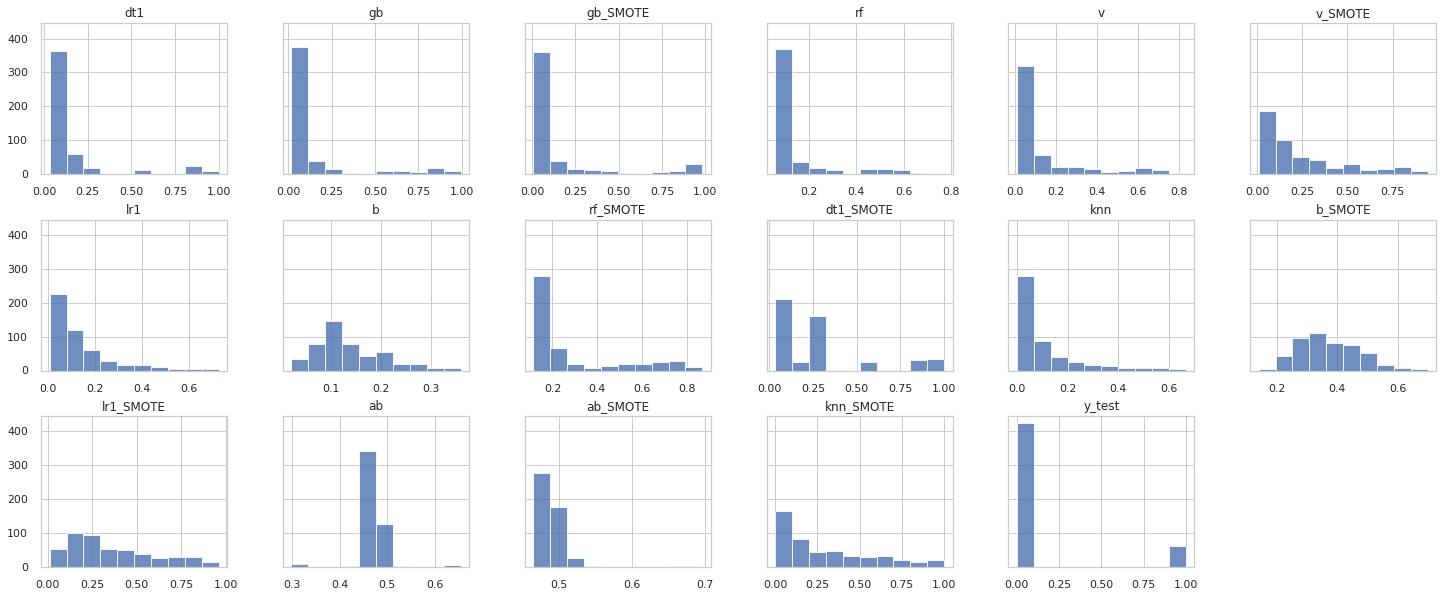

In [ ]:
df_proba.hist(alpha = 0.8, layout= (3,6), figsize = (25,10), sharey=True);

In [ ]:
df_summ.index

Index(['dt1', 'gb', 'gb_SMOTE', 'rf', 'v', 'v_SMOTE', 'lr1', 'b', 'rf_SMOTE',
       'dt1_SMOTE', 'knn', 'b_SMOTE', 'lr1_SMOTE', 'ab', 'ab_SMOTE',
       'knn_SMOTE'],
      dtype='object', name='model')

In [ ]:
# plt.figure(figsize = (12,8))

# y_test_lst = df_proba['y_test']
# # for col in [col for col in df_proba.columns if (col != 'y_test')]:
# for col in ['gb_SMOTE']:
#     fpr_tot= []
#     recall_tot = []
#     for th in np.arange(0.01,0.99,0.01):
#         res_by_th = np.where(df_proba[col] > th,   1, 0)
#         acc = (res_by_th == y_test_lst).sum()/len(y_test_lst)
#         TN = ((res_by_th == 0) &(y_test_lst == 0)).sum()
#         TP = ((res_by_th == 1) &(y_test_lst == 1)).sum()
#         FP = ((res_by_th == 1) &(y_test_lst == 0)).sum()
#         FN = ((res_by_th == 0) &(y_test_lst == 1)).sum()
#         acc = (TN+TP)/len(y_test_lst)
#         recall = TP/(TP+FN)
#         precision = TP/(TP+FP)
#         fpr = FP/(TN+FP)
#         fpr_tot.append(fpr)
#         recall_tot.append(recall)
#     plt.plot(np.arange(0.01,0.99,0.01), recall_tot , label='recall')
#     plt.plot(np.arange(0.01,0.99,0.01), fpr_tot , label='fpr')
#     # plt.plot(fpr_tot, recall_tot , label=col)
# plt.xlabel("th")
# plt.legend(loc=5);

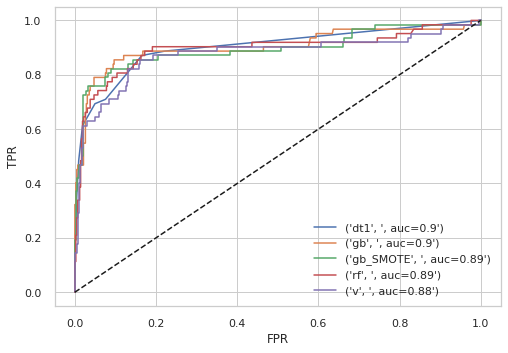

In [ ]:
columns_top5 = df_summ.round(2).sort_values(by='log_loss_test',ascending=True ).iloc[0:5].index
y_test_lst = df_proba['y_test']
for col in columns_top5:
    fpr, tpr, th = roc_curve(y_test_lst,  df_proba[col], pos_label=1)
    auc = roc_auc_score(y_test_lst,   df_proba[col])
    plt.plot(fpr,tpr,label=(col, ", auc="+str(round(auc,2))))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.xlabel("FPR")
plt.ylabel("TPR");

In [ ]:
# df_proba.plot.scatter(x= 'gb', y= 'y_test');

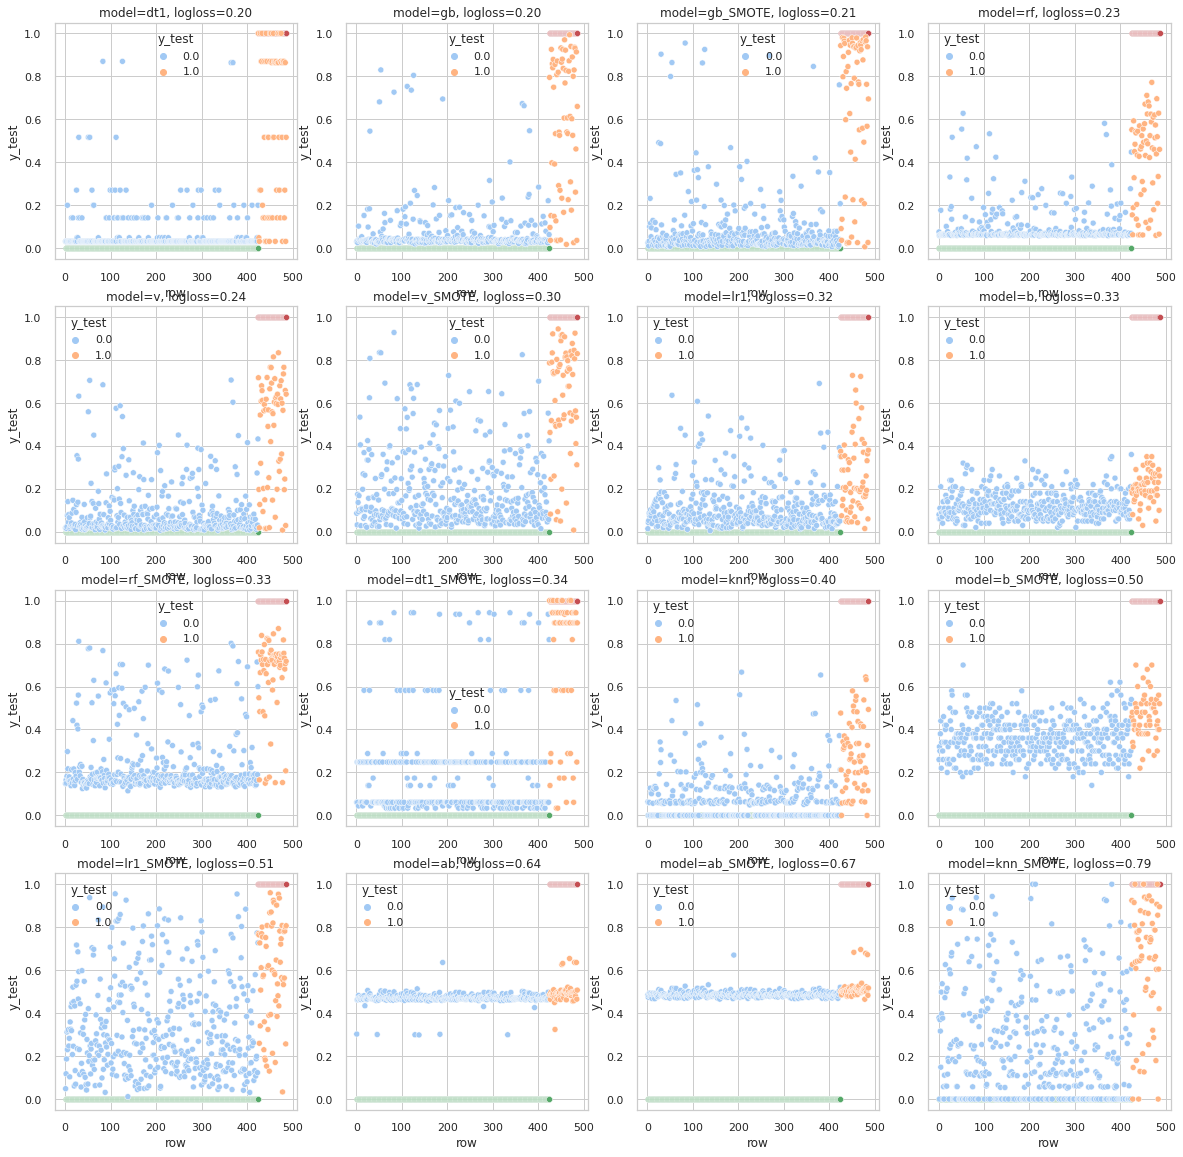

In [ ]:
plt.figure(figsize = (20, 20))
df2 = df_proba.sort_values(by='y_test',ascending=True ).reset_index()
df2['row'] =range(1, df2.shape[0]+1)
columns = [col for col in df_proba.columns if (col != 'y_test') & (col != 'row')]
col_count = len(columns)

for  i, col in enumerate(columns, 1):
    log_loss_test = df_summ.loc[col].log_loss_test
    plt.subplot(4,4,i)
    sns.scatterplot(x='row', y='y_test', data=df2[df2['y_test']==0], color='g')
    sns.scatterplot(x='row', y='y_test', data=df2[df2['y_test']==1], color='r') 

    sns.scatterplot(x='row', y=col, data=df2, hue='y_test', palette ='pastel' )
    plt.title(f'model={col}, logloss={log_loss_test:.2f}')


In [ ]:
np.append((np.random.randint(0,900,5)/1000),(np.random.randint(800,900,2)/1000))

array([0.787, 0.525, 0.179, 0.036, 0.633, 0.863, 0.804])

In [ ]:
type(np.random.randint(0,900,424)/1000)

numpy.ndarray

In [ ]:
y_random = np.append((np.random.randint(0,200,424)/1000),(np.random.randint(800,1000,62)/1000))

In [ ]:
log_loss_test = log_loss(df2['y_test'], y_random)
log_loss_test

0.10881697955852349

In [ ]:
print(df2[df2['y_test']==0].shape[0])
print(df2[df2['y_test']==1].shape[0])

424
62


Text(0.5, 1.0, 'col=random, logloss=0.27')

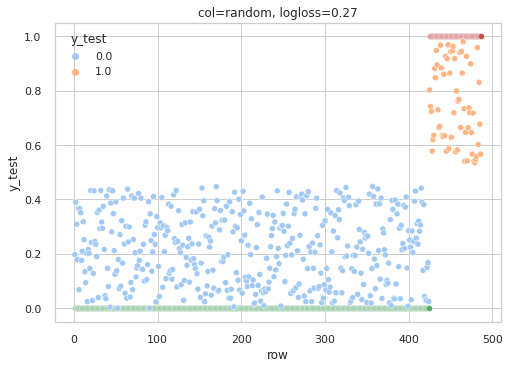

In [ ]:
# y_random= np.random.randint(0,900,df2.shape[0])/550
y_random = np.append((np.random.randint(0,450,424)/1000),(np.random.randint(525,990,62)/1000))
log_loss_test = log_loss(df2['y_test'], y_random)
col = 'random'
sns.scatterplot(x='row', y='y_test', data=df2[df2['y_test']==0], color='g')
sns.scatterplot(x='row', y='y_test', data=df2[df2['y_test']==1], color='r') 

sns.scatterplot(x='row', y=y_random, data=df2, hue='y_test', palette ='pastel' )
plt.title(f'col={col}, logloss={log_loss_test:.2f}')

# 5. Loss Expectaion
בדיקת "תוחלת הפסד" למודלים המובילים 

## 5.1 Loss Expectaion

\begin{align}
\text{E(X)= } &\sum_{i=1}^n x_i  p(x_i)   \\
\end{align}

\begin{align}
\text{E(X)= } x_1  p(x_1) + x_2  p(x_2) + .... +   x_n  p(x_n)  \\
\end{align}

\begin{align}
\text x_1  p(x_1) =  260 * 0.8  + 0 * 0.2  \\
\end{align}

In [ ]:
annual_pay= -260
annual_loss= 0

In [ ]:
columns_top5 = df_summ.round(2).sort_values(by='log_loss_test',ascending=True ).iloc[0:5].index
ds_rev = df_proba*annual_pay
rmse =[]
rev_tot = []
diff = []
diff_p = []
log_loss_1 = []

for col in columns_top5 :
    rmse.append(mse(ds_rev[col], ds_rev['y_test'])**0.5)
    rev_tot.append(ds_rev[col].sum())
    diff.append(ds_rev[col].sum()- ds_rev['y_test'].sum())
    diff_p.append((ds_rev[col].sum()- ds_rev['y_test'].sum())/ds_rev[col].sum()*100)
    log_loss_1.append(df_summ.loc[col]['log_loss_test'])

print(ds_rev['y_test'].sum())
pd.DataFrame({'rmse': rmse , 'rev_tot': rev_tot , 'diff_$': diff,'diff_p': diff_p,'log_loss':log_loss_1}, index=columns_top5).round(2).sort_values(by='diff_$', ascending=False)


-16120.0


,rmse,rev_tot,diff_$,diff_p,log_loss
model,,,,,
dt1,61.26,-16377.54,-257.54,1.57,0.20
gb,59.74,-17252.87,-1132.87,6.57,0.20
rf,65.54,-17297.25,-1177.25,6.81,0.23
v,66.12,-17413.86,-1293.86,7.43,0.24
gb_SMOTE,60.50,-19862.15,-3742.15,18.84,0.21


dt1 המודל הנבחר!

# 6. Setting a threshold

## 6.1 Cost function

In [ ]:
data2 =data1.copy()
X = data2.drop('churn', axis =1)
X = pd.get_dummies(X)
y = data2['churn']
scaler = StandardScaler()
data_transformed = scaler.fit(X, y).transform(X)
X = pd.DataFrame(data_transformed, columns =X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)


* Build a classification model on the given dataset to determine whether the customer will churn or not.

* Target function:

```
Working hypothesis:  
A - annual payment
B - cost of customer retention- phone calls
C = discount כor those who are suspected of leaving
P = Percentage of customers we was able to retain through retention calls

               |     *Pred*   
               |     1        0
         ______|___________________  
            1  |   TP        FN
*Actual*       |
            0  |   FP        TN


Financial loss= (-( (1-P)*A + (P*C)+ (1*B) )*TP +
                A*FN +
                (C+B)*FP +
                0*TN +
```

**Explanation by example:**


```
Working hypothesis:  
A = 260 $/year           (annual payment)  
B = 10 $                 (cost of customer retention- phone calls)
C = 20 $/year           ("sale price")  
P = 0.4                  (Percentage of customers we was able to
retain through retention calls and discount "sale price")


               |     *Pred*   
               |     1        0
         ______|___________________  
            1  |   250       50
*Actual*       |
            0  |   100      1600


f = -0.6*250*260$       #1
    -0.4*250*20$        #2
    -1*250*10$          #3
    -50*260$            #4
    -100*10$            #5
    -100*20$            #6
    -1600*0             #7


הנחת העבודה שבשיחות שימור מצליחם לשמר 40% מהלקוחות.
*TP*
1.   אנשים שעזבו ולא שוכנעו משיחת השימור ואכן עזבו ((1-P)*TP*A)
2.   לקוחות ששיכנעתי להישאר בשיחת שימור אך כעת יש להם מחיר מבצע (P*TP*C)
3.   הוצאות של שיחת השימור עבורם (1*TP*B)
________________________
-( (1-P)*A + (P*C)+(1*B) )*TP
________________________


*FN*
4.   לקוחות שחשבתי שלא יעזבו אבל הם עזבו- כישלון בחיזוי (FN*A)
________________________
-A*FN
________________________


*FP*
5.   לקוחות שחשבתי שהם יעזבו והם לא עזבו - הוצאות על שיחת השימור (FP*B)
6.   אמנם לא עזבו אך ניתן להם מחיר מבצע (FP*C)
________________________
-(C+B)*FP
________________________


*TN*
7.   לקוחות שלא עזבו ונשארו עם מחיר "רגיל" (TN*0)
________________________
-0*TN
________________________
```




In [ ]:
A, B, C, P = 260, 10, 20, 0.4
print(f'TP factor={-((1-P)*A + (P*C)+(1*B))}')
print(f'FN factor={-A}')
print(f'FP factor={-(C+B)}')
print(f'TN factor={-0}')

TP factor=-174.0
FN factor=-260
FP factor=-30
TN factor=0


In [ ]:
cost_param = {'A': 260, 'B': 10, 'C': 20, 'P': 0.4}

In [ ]:
def sum_list(list1):
    res = 0
    for el in list1:
        res +=el

    return res


def cost_function(y_test, y_test_pred, print_cm =0, **kwargs):

    CM = confusion_matrix(y_test, y_test_pred)
    TN, FP, FN, TP = confusion_matrix(y_test,y_test_pred).ravel()

    loss_TP = -((1-P)*A + (P*C)+(1*B))*TP
    loss_FN = -A*FN
    loss_FP = -(C+B)*FP
    loss_TN = -0*TN 

    financial_loss= sum_list((loss_TP,
                        loss_FN ,
                        loss_FP ,
                        loss_TN))
    
    if print_cm == 1:
        print(f'''
                        |       *Pred*                                  |       *Pred*   
                        |     1           0                             |     1             0           
                ________|_____________________________          ________|_____________________________        
                     1  | {TP:7.0f}   {FN:7.0f}                          1  |   {loss_TP:7.0f}$   {loss_FN:7.0f}$  
        *Actual*        |                                *Actual*       |                            
                     0  | {FP:7.0f}   {TN:7.0f}                          0  |   {loss_FP:7.0f}$   {loss_TN:7.0f}$  
        ''')
    return (financial_loss)

In [ ]:
cost_function(y_test, y_test, print_cm =1, **cost_param)


                        |       *Pred*                                  |       *Pred*   
                        |     1           0                             |     1             0           
                ________|_____________________________          ________|_____________________________        
                     1  |      62         0                          1  |    -10788$         0$  
        *Actual*        |                                *Actual*       |                            
                     0  |       0       424                          0  |         0$         0$  
        


-10788.0

In [ ]:
cost_function(y_test, y_test_pred, print_cm =1, **cost_param)


                        |       *Pred*                                  |       *Pred*   
                        |     1           0                             |     1             0           
                ________|_____________________________          ________|_____________________________        
                     1  |      43        19                          1  |     -7482$     -4940$  
        *Actual*        |                                *Actual*       |                            
                     0  |      97       327                          0  |     -2910$         0$  
        


-15332.0

In [ ]:
cost_function(y_test, [0]*len(y_test), print_cm =1, **cost_param)


                        |       *Pred*                                  |       *Pred*   
                        |     1           0                             |     1             0           
                ________|_____________________________          ________|_____________________________        
                     1  |       0        62                          1  |        -0$    -16120$  
        *Actual*        |                                *Actual*       |                            
                     0  |       0       424                          0  |         0$         0$  
        


-16120.0

In [ ]:
cost_function(y_test, [1]*len(y_test), print_cm =1, **cost_param)


                        |       *Pred*                                  |       *Pred*   
                        |     1           0                             |     1             0           
                ________|_____________________________          ________|_____________________________        
                     1  |      62         0                          1  |    -10788$         0$  
        *Actual*        |                                *Actual*       |                            
                     0  |     424         0                          0  |    -12720$         0$  
        


-23508.0

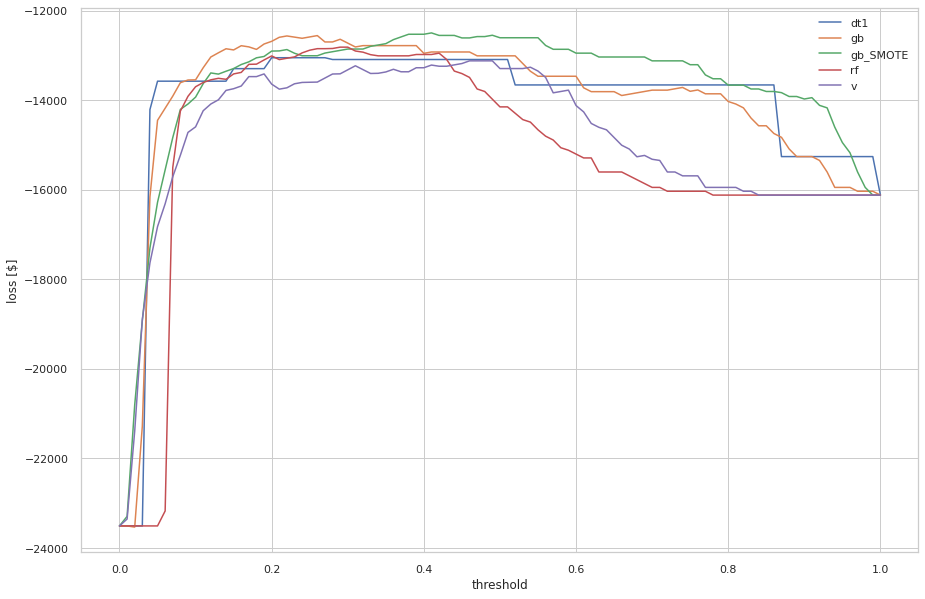

In [ ]:

cost_param = {'A': 260, 'B': 10, 'C': 20, 'P': 0.4}
y_test_lst = list(y_test)
models_top5 = list(df_summ.round(2).sort_values(by='log_loss_test',ascending=True ).iloc[0:5].index)

res_dict = {}
thresholds = np.arange(0,1.001,0.001)
thresholds = np.arange(0,1.01,0.01)
res_dict['thresholds'] = thresholds

for model in models_top5:
    proba = list(df_proba[model])
    
    df = pd.DataFrame({'y_test': y_test_lst, 'prob':proba})
    res =[]

    for th in thresholds:
        res_by_th = np.where(df.prob > th,   1, 0)
        loss = cost_function(y_test_lst, res_by_th, **cost_param)
        res.append(loss)

    res_dict[model] = res


df_cost = pd.DataFrame(res_dict).set_index('thresholds')
df_cost.plot(figsize=(15,10)) 

plt.xlabel('threshold')
plt.ylabel('loss [$]');

In [ ]:
res_by_th = np.where(df_proba['gb_SMOTE'] > 0.1,   1, 0)
cost_function(y_test_lst, res_by_th,print_cm =1, **cost_param)


                        |       *Pred*                                  |       *Pred*   
                        |     1           0                             |     1             0           
                ________|_____________________________          ________|_____________________________        
                     1  |      53         9                          1  |     -9222$     -2340$  
        *Actual*        |                                *Actual*       |                            
                     0  |      79       345                          0  |     -2370$         0$  
        


-13932.0

In [ ]:
res_by_th = np.where(df_proba['gb_SMOTE'] > 0.5,   1, 0)
cost_function(y_test_lst, res_by_th,print_cm =1, **cost_param)


                        |       *Pred*                                  |       *Pred*   
                        |     1           0                             |     1             0           
                ________|_____________________________          ________|_____________________________        
                     1  |      44        18                          1  |     -7656$     -4680$  
        *Actual*        |                                *Actual*       |                            
                     0  |       9       415                          0  |      -270$         0$  
        


-12606.0

In [ ]:
models_top5 = list(df_summ.round(2).sort_values(by='log_loss_test',ascending=True ).iloc[0:5].index)
res ={}
th_min = []
min_loss = []
for model in models_top5:
    th_min.append(df_cost[model].idxmax(axis=0))
    min_loss.append(df_cost[model].max())


pd.DataFrame({'models':models_top5, 'th_min':th_min, 'min_loss':min_loss}).set_index('models').sort_values(by='min_loss', ascending=True)

,th_min,min_loss
models,,
v,0.46,-13122.0
dt1,0.20,-13052.0
rf,0.29,-12816.0
gb,0.26,-12558.0
gb_SMOTE,0.41,-12498.0


# 7. Pipline

### 7.1 Pipeline

In [ ]:
# df_summ.loc['gb_SMOTE']['best_estimator']
df_summ.loc['dt1']['best_estimator']

'DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5)'

In [ ]:
path = csv_drive_path_generatoer('https://drive.google.com/file/d/1EH0ZuSov32m7qwrmnLSyiBbUZ9Y9Iml5/view?usp=sharing')
data_f = pd.read_csv(path, index_col=0)

In [ ]:
data_f = data.reset_index().drop(['customer_id','phone_no','year'],  axis=1)
data_f = data_f[data_f['churn'].notna()]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [ ]:
numerical_cols = X.select_dtypes([np.int64,np.float64]).columns
categorical_cols = X.select_dtypes([object]).columns

gs_params = {'estimstor__C': [0.0001,0.001],
             'estimstor__penalty': ['l2','l1']}

# estimstor = GradientBoostingClassifier(max_depth=25, max_leaf_nodes=5, min_samples_leaf=3)
# estimstor = GradientBoostingClassifier(max_depth=20, max_leaf_nodes=20, min_samples_leaf=6)
estimstor = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5)

In [ ]:
param_grid_dt = {'max_depth': [5, 10, 20, 25],
 'max_leaf_nodes': [2, 5, 10, 15],
 'min_samples_leaf': [2, 3, 4, 5]}

In [ ]:
oversample = SMOTE(sampling_strategy=0.8)
# underrsample = RandomUnderSampler(sampling_strategy=0.9)

In [ ]:
categorical_transformer = Pipeline(steps=
                                    [
                                     ('imputer', SimpleImputer(strategy='most_frequent')),
                                     ('onehot', OneHotEncoder(handle_unknown='ignore'))]
                                   )

continuous_transformer = Pipeline(steps=
                                  [('imputer', SimpleImputer(strategy='median')),
                                    # ('scaler', StandardScaler()),
                                   ])


preprocessor = ColumnTransformer(transformers=
                                  [('num', continuous_transformer, numerical_cols),
                                   ('cat', categorical_transformer, categorical_cols)])
                                  

pipeline = Pipeline(steps=
                  [ ('preprocess', preprocessor),
                    ('smote', oversample),
                    # ('underrsample', underrsample),
                    ('estimstor', estimstor)])


model = GridSearchCV(pipeline, param_grid=param_grid_dt, cv=2, n_jobs=4, scoring = 'neg_log_loss')

# model = GradientBoostingClassifier(max_depth=20, max_leaf_nodes=20, min_samples_leaf=6)

In [ ]:
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)
log_loss_test = log_loss(y_test , y_test_pred_proba)
log_loss_test

0.2197553774109802

In [ ]:
# transformed_df = pd.DataFrame(pipeline.steps[0][1].transform(X_train))
# transformed_df.head()

# END

# Archive

In [ ]:
# results =[]
# # print("1. Current Time =", datetime.now().strftime("%H:%M:%S"))

# for i, test_size1 in enumerate(np.linspace(0.01, 0.6 , 12)):

#     # print(test_size1)
#     for run in range(20):
#         # print('run: ', run, '/2')
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size1) #, random_state=314159

#         #'LogisticRegression'
#         model = LogisticRegression()
#         model.fit(X_train, y_train)
#         y_test_pred = model.predict(X_test)
#         results += [[ test_size1, (model.predict(X_test)== y_test).sum()/len(y_test),'LinearRegression']]

#         #'DecisionTreeClassifier'
#         model = DecisionTreeClassifier()
#         model.fit(X_train, y_train)
#         y_test_pred = model.predict(X_test)
#         results += [[test_size1, (model.predict(X_test)== y_test).sum()/len(y_test),'DecisionTreeClassifier']]

#         model = KNeighborsClassifier()
#         model.fit(X_train, y_train)
#         y_test_pred = model.predict(X_test)
#         results += [[test_size1,(model.predict(X_test)== y_test).sum()/len(y_test),'KNeighborsClassifier']]
                                                                            
#         #'AdaBoostClassifier'
#         model = AdaBoostClassifier()
#         model.fit(X_train, y_train)
#         y_test_pred = model.predict(X_test)
#         results += [[test_size1, (model.predict(X_test)== y_test).sum()/len(y_test),'AdaBoostClassifier']]

# # print("2. Current Time =", datetime.now().strftime("%H:%M:%S"))

In [ ]:
# results_df = pd.DataFrame(results, columns=['test_size', 'accuarcy','model'])
# sns.lineplot(x='test_size', y='accuarcy', data=results_df, hue='model')

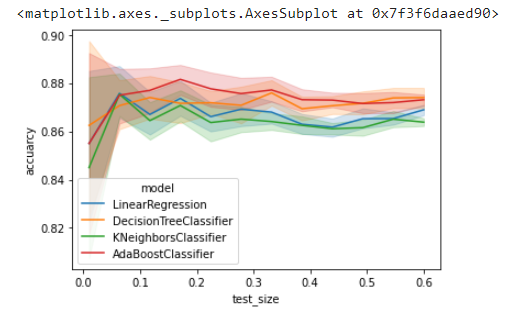

חנן, עלה לי רעיון לעקוב בבניית המודלים אחרי פונקציית מטרה עסקית. ז"א לנסות למקסם את הרווח של החברה.

אני ארשום דוגמא ונדבר על זה בטלפון. ותגיד לי את דעתך ואם נראה לך גם נדבר עם רז בשישי.

הרעיון הוא לא לעקוב אחרי האקיוריסי או הרה-קול אלא אחרי הרווח שלהחברה. ולראות לאורך הפרוייקט שלנו איך אנחנו ממקסמים אותו.

קח אוויר... זה הולך להיות מבלבל. אותי לפחות זה בלבל...

אז ככה, נגיד שיש במציאות 2000 לקוחות. מתוכם 1700 נשארים ו-300 עוזבים.

לאחר בניית מודל הגעת ל 

confusion matrix כזה:

In [ ]:
gbc = GradientBoostingClassifier(max_depth=5, min_samples_leaf=3)
gbc2 = GradientBoostingClassifier()
gbc3 = GradientBoostingClassifier(max_depth=None, min_samples_leaf=None,max_leaf_nodes= None)

for model in [gbc,gbc2, gbc3]:
    print()
    print(str(model),':')
    cv_list = cross_val_score(model, X_test, y_test, cv = 10)
    # print(cv_list)
    print('mean=', round(np.mean(cv_list),2))
    print('std=', round(np.std(cv_list),2))


GradientBoostingClassifier(max_depth=5, min_samples_leaf=3) :
mean= 0.92
std= 0.04

GradientBoostingClassifier() :
mean= 0.93
std= 0.03

GradientBoostingClassifier(max_depth=None, min_samples_leaf=None) :
mean= nan
std= nan


לשאול את רז
None זה לא defualt